# ATOC5860 - ks_test_onesample - Lecture #3
##### Originally coded by Prof. Barnes (CSU), updated/adapted for Jupyter Notebook/Python3 by Prof. Kay (CU)
##### Last updated: January 27, 2022

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
%matplotlib inline

In [2]:
### Compare 1 sample with the TRUE normal
### Test the null hypothesis that the two distributions are identical

## Let's say you 1 sample with N observations having nu degrees of freedom
## (generate this sample below drawing randomly from a t-distribution)
nu = 100 ## nu=degrees of freedom (Try Changing This...)
N = 1000  ## number of random variates
x2 = stats.t.rvs(nu,size=N) ## generate N random numbers with nu degrees of freedom
##print(np.shape(x2))

KS test statistic: 0.017
p-value (must be less than 0.05 to reject the null hypothesis at the 95% confidence level): 0.94


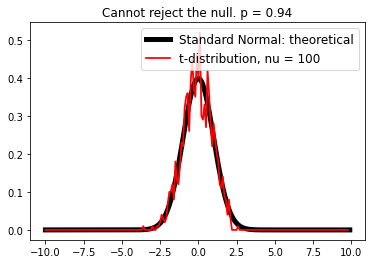

In [3]:
## Is your your sample normally distributed?  Use a KS test!
## Test the null hypothesis that your sample distribution and the normal distribution are identical.
D, p = stats.kstest(x2,'norm') ## https://docs.scipy.org/doc/scipy-0.14.0/reference/generated/scipy.stats.kstest.html
print('KS test statistic:',np.round(D,3))
print('p-value (must be less than 0.05 to reject the null hypothesis at the 95% confidence level):',np.round(p,3))

x = np.arange(-10.,10.,.1)
z = stats.norm.pdf(x,0,1)
plt.plot(x,z,color = 'black', label = 'Standard Normal: theoretical', linewidth = 5)
hist, bin_edges = np.histogram(x2,x, density=True)
plt.plot(bin_edges[:-1],hist,color = 'red', label = 't-distribution, nu = ' + str(nu), linewidth = 1.75)
plt.legend(fontsize = 12)
if(p<0.05):
    plt.title('Reject the null. p = ' + str(round(p, 3)))
else:
    plt.title('Cannot reject the null. p = ' + str(round(p, 3)))

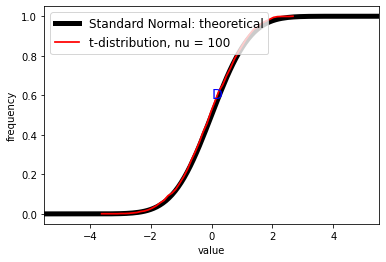

In [4]:
### For fun... Plot the cumulative distribution function and show the location where the two distributions
### exhibit the largest difference.
ax = plt.axes()
zc = stats.norm.cdf(x,0,1)
x2c = stats.cumfreq(x2, numbins = 50)
y = x2c.lowerlimit + np.linspace(0, x2c.binsize*x2c.cumcount.size,x2c.cumcount.size)

plt.plot(x,zc,color = 'black',label = 'Standard Normal: theoretical', linewidth = 5)
plt.plot(y,x2c.cumcount/len(x2),color = 'red', label = 't-distribution, nu = ' + str(nu), linewidth = 1.75)

## find location of biggest difference - Label it "D"
##need to first interpolate to the same grid
xinterp = np.arange(-5,5,.1)
x2c_interp = np.interp(xinterp,y,x2c.cumcount/len(x2), right = 1.0)
zc_interp = np.interp(xinterp,x,zc,right = 1.0)
diff_vec = np.abs(x2c_interp - zc_interp)
i = np.argmax(diff_vec)
ax.arrow(xinterp[i],zc_interp[i],0.0,x2c_interp[i] - zc_interp[i], length_includes_head = True, head_width=0.05, head_length=0.025, fc='k', ec='k')
##plot the difference between the two CDFs
plt.text(xinterp[i-2],zc_interp[i] + (x2c_interp[i] - zc_interp[i])/3.,'D', fontsize = 14,color='blue');
plt.xlim(-5.5,5.5);
plt.xlabel('value');
plt.ylabel('frequency');
plt.legend(fontsize = 12, loc = 'upper left');